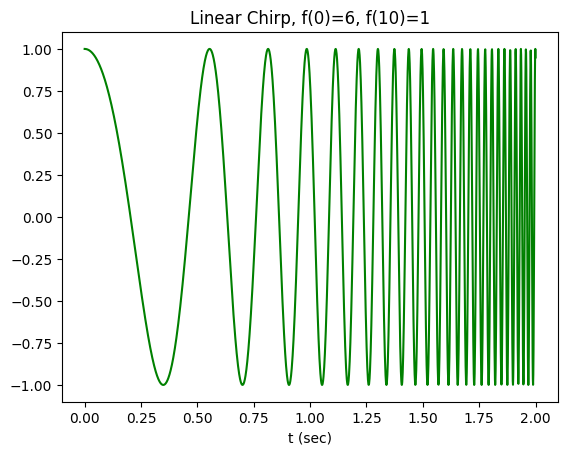

In [65]:
import numpy as np
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import sounddevice as sd

t = np.linspace(0, 2, 2000)
w = chirp(t, f0=1, f1=50, t1=2, method='logarithmic')
plt.plot(t, w, 'g')
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')
plt.show()

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PIL import Image

# Parámetros de la señal chirp
t = np.linspace(0, 1, 1000)
f0 = 1
f1 = 50
t1 = 1

# Generar la señal chirp
chirp_signal = signal.chirp(t, f0, t1, f1, method='logarithmic')

# Ajustar el paso de incremento para generar menos frames
frame_step = 10

# Crear una lista de figuras para cada frame
figs = []
for i in range(0, len(chirp_signal), frame_step):
    fig, ax = plt.subplots()
    ax.plot(t[:i], chirp_signal[:i], 'g')
    ax.set_xlim(0, 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')  # Desactivar los ejes
    ax.set_title('')  # Eliminar el título
    fig.canvas.draw()

    # Convertir el gráfico en una imagen y añadirla a la lista
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    figs.append(image)
    plt.close(fig)

# Crear el GIF
gif_images = [Image.fromarray(image) for image in figs]
gif_images[0].save('chirp_signal.gif', save_all=True, append_images=gif_images[1:], optimize=False, duration=10, loop=0)
